In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('GSE159337_rare_dis_read_count_ori.csv.gz')

In [3]:
file = data.to_csv()

In [4]:
data.dropna(inplace=True)
data

,V1,C1,C2,C3,C4,C5,C6,C7,P1,P2,P3,P4,P5,P6,P7
0,ENSG00000223972,8,5,12,10,8,8,6,12,3,9,13,7,3,2
1,ENSG00000227232,12,23,34,19,29,24,26,22,14,25,35,38,19,14
2,ENSG00000278267,2,2,1,0,0,0,1,0,5,0,1,2,1,0
3,ENSG00000243485,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,ENSG00000284332,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000271254,49,41,42,39,55,59,68,46,70,76,41,52,48,78
60619,ENSG00000275405,218,88,287,157,338,286,292,117,189,249,121,388,195,187
60620,ENSG00000275987,0,0,0,0,0,0,0,0,0,0,0,0,2,0
60621,ENSG00000277475,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [6]:
gene = data['V1']
data.drop(['V1'],axis=1,inplace=True)

In [7]:
data

,C1,C2,C3,C4,C5,C6,C7,P1,P2,P3,P4,P5,P6,P7
0,8,5,12,10,8,8,6,12,3,9,13,7,3,2
1,12,23,34,19,29,24,26,22,14,25,35,38,19,14
2,2,2,1,0,0,0,1,0,5,0,1,2,1,0
3,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,49,41,42,39,55,59,68,46,70,76,41,52,48,78
60619,218,88,287,157,338,286,292,117,189,249,121,388,195,187
60620,0,0,0,0,0,0,0,0,0,0,0,0,2,0
60621,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [8]:
data.sum()

C1     7761791
C2     8473880
C3    10214610
C4     9534674
C5    11657708
C6    10134547
C7    10738271
P1    10236728
P2     9901106
P3     9691956
P4     7717416
P5     9856777
P6     9325919
P7     8963707
dtype: int64

In [9]:
cpm = []
for i in range(0,len(data.columns)):
    tot = data.iloc[:,i].sum()
    count = (data.iloc[:,i]/tot)*10**6
    cpm.append(count)
    

In [10]:
cpm

[0         1.030690
 1         1.546035
 2         0.257672
 3         0.000000
 4         0.000000
            ...    
 60618     6.312976
 60619    28.086301
 60620     0.000000
 60621     0.000000
 60622     0.000000
 Name: C1, Length: 60623, dtype: float64,
 0         0.590048
 1         2.714223
 2         0.236019
 3         0.000000
 4         0.000000
            ...    
 60618     4.838398
 60619    10.384853
 60620     0.000000
 60621     0.000000
 60622     0.000000
 Name: C2, Length: 60623, dtype: float64,
 0         1.174788
 1         3.328566
 2         0.097899
 3         0.000000
 4         0.000000
            ...    
 60618     4.111758
 60619    28.097010
 60620     0.000000
 60621     0.000000
 60622     0.000000
 Name: C3, Length: 60623, dtype: float64,
 0         1.048804
 1         1.992727
 2         0.000000
 3         0.104880
 4         0.000000
            ...    
 60618     4.090334
 60619    16.466216
 60620     0.000000
 60621     0.000000
 60622     0.0

In [11]:
cpm = np.array(cpm)
cpm

array([[1.03068995, 1.54603493, 0.25767249, ..., 0.        , 0.        ,
        0.        ],
       [0.59004848, 2.714223  , 0.23601939, ..., 0.        , 0.        ,
        0.        ],
       [1.17478788, 3.32856565, 0.09789899, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71017129, 3.85521555, 0.20290608, ..., 0.        , 0.        ,
        0.        ],
       [0.32168411, 2.03733273, 0.10722804, ..., 0.21445608, 0.        ,
        0.        ],
       [0.22312197, 1.56185382, 0.        , ..., 0.        , 0.11156099,
        0.        ]])

In [12]:
log = np.log2(cpm)

C:\Users\joash\AppData\Local\Temp\ipykernel_4336\3922138364.py:1: RuntimeWarning: divide by zero encountered in log2
  log = np.log2(cpm)


In [13]:
log

array([[ 0.04361041,  0.62857291, -1.95638959, ...,        -inf,
               -inf,        -inf],
       [-0.7610946 ,  1.44053926, -2.0830227 , ...,        -inf,
               -inf,        -inf],
       [ 0.23240028,  1.73490062, -3.35256222, ...,        -inf,
               -inf,        -inf],
       ...,
       [-0.49376106,  1.94681153, -2.30111599, ...,        -inf,
               -inf,        -inf],
       [-1.6362834 ,  1.02668161, -3.2212459 , ..., -2.2212459 ,
               -inf,        -inf],
       [-2.16409549,  0.64325943,        -inf, ...,        -inf,
        -3.16409549,        -inf]])

In [14]:
log[1].max()

15.174682798163692

In [15]:
import scipy.stats as stat
z=stat.zscore(log)
z

c:\users\joash\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\users\joash\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\stats.py:2553: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


array([[ 0.69661072, -1.30660071,         nan, ...,         nan,
                nan,         nan],
       [-0.29767072,  0.42016884,         nan, ...,         nan,
                nan,         nan],
       [ 0.92987665,  1.04617292,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.03264258,  1.49683359,         nan, ...,         nan,
                nan,         nan],
       [-1.37904086, -0.45996219,         nan, ...,         nan,
                nan,         nan],
       [-2.03119757, -1.27536761,         nan, ...,         nan,
                nan,         nan]])

In [16]:
#Convert to dataframe
df = pd.DataFrame(z).T
df = df.dropna(axis = 0)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.696611,-0.297671,0.929877,0.727666,-0.028459,0.221133,-0.394828,0.926021,-1.485726,0.510688,1.572284,0.032643,-1.379041,-2.031198
1,-1.306601,0.420169,1.046173,-0.527883,0.152699,0.001673,0.069719,-0.296067,-1.580530,0.263922,1.995222,1.496834,-0.459962,-1.275368
15,0.850138,1.928413,-0.716694,0.707761,-1.396416,0.608975,-0.436359,-1.185964,0.456009,-1.753890,0.643228,-0.658959,0.336715,0.617043
19,-0.163265,-0.513262,-0.052072,1.883398,1.819537,1.278408,-0.225242,-1.163904,-0.584378,-0.463463,-0.281826,0.577512,-0.502901,-1.608542
25,0.232557,0.706245,-1.222529,0.550407,-0.684976,-0.119873,-2.027985,-1.429061,0.602266,0.166186,1.964312,0.790727,0.349290,0.122435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60563,-0.512586,-1.421312,1.221792,-1.004316,1.125293,-0.091290,-0.080256,1.094083,-0.253699,-0.252089,-1.017413,-0.826040,2.203993,-0.186160
60595,-0.775831,0.462039,-0.533163,1.600116,1.278321,1.192469,1.261264,-0.230254,-1.104307,-0.057021,-1.546566,-1.230233,-0.638942,0.322108
60616,0.555945,1.369174,0.144463,-1.472605,-2.072483,-0.860593,-0.171773,0.141808,0.573615,0.599821,-0.526147,-0.662577,1.578848,0.802504
60618,0.557072,-0.633151,-1.361238,-1.384611,-0.745979,0.194579,0.570881,-0.963897,1.063728,1.527195,-0.214780,-0.246135,-0.356561,1.992897


In [17]:
ar = df.values

<AxesSubplot:>

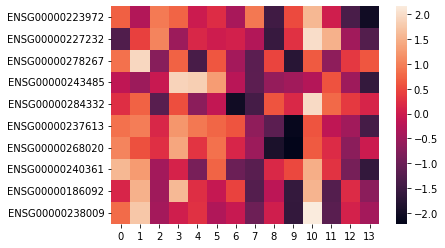

In [18]:
import seaborn as sns
sns.heatmap(ar[0:10],xticklabels = 'auto',yticklabels = gene[0:10])


In [19]:

var = []
for i in range(0,len(z)):
    vari = z[:,i].var()
    var.append(vari)
    

In [20]:
var

[1.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [21]:
vec1 = cpm[0:3]
vec1
vec2 = cpm[4:7]
vec2

array([[0.68624124, 2.4876245 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.78937914, 2.36813742, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55874917, 2.4212464 , 0.09312486, ..., 0.        , 0.        ,
        0.        ]])

In [22]:
meanTum = np.mean(vec1,axis=0)
meanCont = np.mean(vec2,axis=0)

In [23]:
from scipy.stats import ttest_ind
Pvalue = ttest_ind(vec1,vec2).pvalue
Pvalue

array([0.24870757, 0.85242004, 0.04775056, ...,        nan,        nan,
              nan])

In [24]:
log2FC = meanTum - meanCont
log2FC

array([0.25371892, 0.10393842, 0.16615534, ..., 0.        , 0.        ,
       0.        ])

In [25]:
res = np.stack((meanTum,meanCont,Pvalue,log2FC),axis = 0)
res

array([[0.9318421 , 2.52960786, 0.19719696, ..., 0.        , 0.        ,
        0.        ],
       [0.67812318, 2.42566944, 0.03104162, ..., 0.        , 0.        ,
        0.        ],
       [0.24870757, 0.85242004, 0.04775056, ...,        nan,        nan,
               nan],
       [0.25371892, 0.10393842, 0.16615534, ..., 0.        , 0.        ,
        0.        ]])

In [26]:
data = pd.DataFrame(res)
data = data.T
data

,0,1,2,3
0,0.931842,0.678123,0.248708,0.253719
1,2.529608,2.425669,0.852420,0.103938
2,0.197197,0.031042,0.047751,0.166155
3,0.000000,0.000000,NaN,0.000000
4,0.000000,0.000000,NaN,0.000000
...,...,...,...,...
60618,5.087710,5.624023,0.541218,-0.536313
60619,22.189388,28.135485,0.372395,-5.946097
60620,0.000000,0.000000,NaN,0.000000
60621,0.000000,0.000000,NaN,0.000000


In [27]:
data.columns = ['meanTumor','meanControl','Pvalue','Log2FC']
data

,meanTumor,meanControl,Pvalue,Log2FC
0,0.931842,0.678123,0.248708,0.253719
1,2.529608,2.425669,0.852420,0.103938
2,0.197197,0.031042,0.047751,0.166155
3,0.000000,0.000000,NaN,0.000000
4,0.000000,0.000000,NaN,0.000000
...,...,...,...,...
60618,5.087710,5.624023,0.541218,-0.536313
60619,22.189388,28.135485,0.372395,-5.946097
60620,0.000000,0.000000,NaN,0.000000
60621,0.000000,0.000000,NaN,0.000000


In [28]:
data.to_csv('name.csv')

In [29]:
data['Pvalue'] = data['Pvalue'].fillna(1)
data

,meanTumor,meanControl,Pvalue,Log2FC
0,0.931842,0.678123,0.248708,0.253719
1,2.529608,2.425669,0.852420,0.103938
2,0.197197,0.031042,0.047751,0.166155
3,0.000000,0.000000,1.000000,0.000000
4,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...
60618,5.087710,5.624023,0.541218,-0.536313
60619,22.189388,28.135485,0.372395,-5.946097
60620,0.000000,0.000000,1.000000,0.000000
60621,0.000000,0.000000,1.000000,0.000000


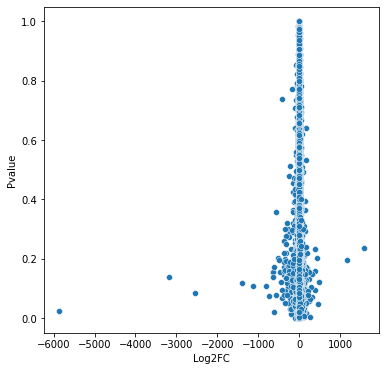

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
ax = sns.scatterplot(data = data,x = 'Log2FC',y = 'Pvalue')

In [33]:
data

,meanTumor,meanControl,Pvalue,Log2FC
0,0.931842,0.678123,0.248708,0.253719
1,2.529608,2.425669,0.852420,0.103938
2,0.197197,0.031042,0.047751,0.166155
3,0.000000,0.000000,1.000000,0.000000
4,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...
60618,5.087710,5.624023,0.541218,-0.536313
60619,22.189388,28.135485,0.372395,-5.946097
60620,0.000000,0.000000,1.000000,0.000000
60621,0.000000,0.000000,1.000000,0.000000


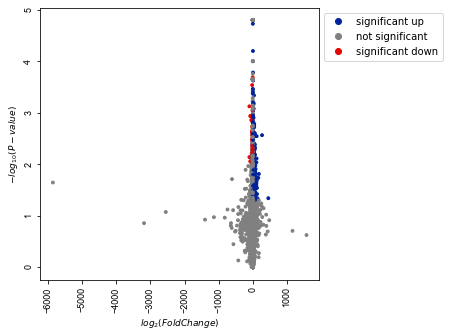

In [32]:
from bioinfokit import visuz,analys
visuz.GeneExpression.volcano(data, lfc='Log2FC', pv='Pvalue', lfc_thr=(1, 2), pv_thr=(0.05, 0.01), 
    color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1),show = True)

In [39]:
#Creating a function to calculate the log value from the csv file
import numpy as np

def lg(var):
    try:
        data = pd.read_csv(var)
        data.dropna(inplace = True)
        data = data._get_numeric_data()
        cpm = []
        for i in range(0,len(data.columns)):
            tot = data.iloc[:,i].sum()
            count = data.iloc[:,i]/(tot*(10**6))
            cpm.append(count)
        cpm = np.array(cpm)
        log = np.log2(cpm)
        return log
    except:
        print("Enter the correct csv file")
    

    

In [40]:
#Using the function
lg('GSE149650_Read_counts.csv')  

C:\Users\joash\AppData\Local\Temp\ipykernel_4336\2512215517.py:14: RuntimeWarning: divide by zero encountered in log2
  log = np.log2(cpm)


array([[-33.53221886,         -inf, -32.23265858, ..., -40.48058609,
                -inf,         -inf],
       [-34.67689924,         -inf, -34.12193147, ...,         -inf,
                -inf,         -inf],
       [-34.04418954,         -inf, -32.61201613, ...,         -inf,
                -inf,         -inf],
       ...,
       [-34.3996587 ,         -inf, -33.0906119 , ...,         -inf,
                -inf,         -inf],
       [-34.64358152,         -inf, -32.8904187 , ...,         -inf,
        -40.59777783,         -inf],
       [-33.54416066,         -inf, -32.13137914, ...,         -inf,
                -inf,         -inf]])